In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD, Adam

from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.
C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
#讀資料
(x_train_0,y_train_0),(x_test_0,y_test_0) = mnist.load_data()

In [5]:
x_train = x_train_0.reshape(60000,784)
x_test = x_test_0.reshape(10000,784)

In [6]:
print(x_train.shape)
print(x_test.shape) #確認是否reshape成功

(60000, 784)
(10000, 784)


In [7]:
#對x進行normalize

x_train = (x_train-x_train.min())/(x_train.max()-x_train.min())
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min())

In [8]:
#one hot encoding
y_train = np_utils.to_categorical(y_train_0, 10)
y_test = np_utils.to_categorical(y_test_0, 10)

In [9]:
from keras.models import Model
from keras.layers import Input
from keras.layers import concatenate, add

先構想出這個model的形狀，並定義各個function的名稱，以及各層的輸入、輸出:

<img src="my_hw8_1_model.jpg" alt="drawing" style="width: 400px;"/>

In [10]:
x = Input(shape=(784,))

In [11]:
#定義function
f_1 = Dense(200, activation='sigmoid')

f_21 = Dense(100, activation='sigmoid')
f_22 = Dense(100, activation='sigmoid')

f_3 = Dense(50, activation='sigmoid')

f_41 = Dense(30, activation='sigmoid')
f_42 = Dense(30, activation='sigmoid')
f_43 = Dense(30, activation='sigmoid')

f_5= Dense(10, activation='softmax')

In [12]:
#建立function 輸入、輸出間的關係
h_1 = f_1(x)

h_21 = f_21(h_1)
h_22 = f_22(h_1)

h_3 = f_3(concatenate([h_21,h_22]))

h_41 = f_41(h_3)
h_42 = f_42(h_3)
h_43 = f_43(h_3)

y = f_5(concatenate([h_41,h_42,h_43]))

In [13]:
model = Model(x, y)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 784)           0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 200)           157000                                       
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 100)           20100                                        
____________________________________________________________________________________________________
dense_3 (Dense)                  (None, 100)           20100                                        
___________________________________________________________________________________________

In [14]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [15]:
model_his = model.fit(x_train, y_train, batch_size=100, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s - loss: 0.8883 - acc: 0.7336     
Epoch 2/5
60000/60000 [==============================] - 3s - loss: 0.2377 - acc: 0.9354     
Epoch 3/5
60000/60000 [==============================] - 3s - loss: 0.1534 - acc: 0.9572     
Epoch 4/5
60000/60000 [==============================] - 3s - loss: 0.1143 - acc: 0.9674     
Epoch 5/5
60000/60000 [==============================] - 3s - loss: 0.0899 - acc: 0.9741     


In [16]:
score = model.evaluate(x_test,y_test)
print('\n----------------------------------')
print(f'loss:{score[0]}')
print(f'正確率:{score[1]}')

 9536/10000 [===========================>..] - ETA: 0s
----------------------------------
loss:0.11466405219063162
正確率:0.9683


<function matplotlib.pyplot.show(*args, **kw)>

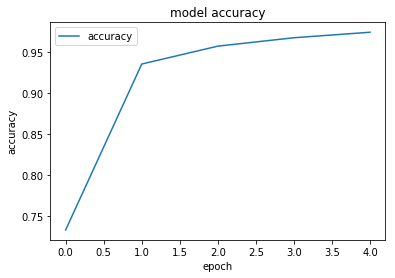

In [17]:
plt.plot(model_his.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["accuracy"],loc = "best")
plt.show